For the purposes of this problem, we will define a brown dwarf as any object whose mass is below $M_{BD} = 0.075 M_{\odot}$, the hydrogen burning limit. We would like to know if these could plausibly be produced via turbulent fragmentation, as appears to be the case for stars.

I'm guessing this is referring to the possibility that brown dwarfs condense straight out of turbulent gas as opposed to perhaps binary formation from gas bound to a more massive star?

# (a)

For a Chabrier (2005) IMF (see Chapter 2, equation 2.3), compute the fraction $f_{BD}$ of the total mass of stars produced that are brown dwarfs.

In [28]:
import numpy as np
from scipy.integrate import quad

def xi(m, mc=0.22, sigma=0.57, x=1.3):
    dndlogm = np.exp( -(np.log10(m)-np.log10(mc))**2 / (2.0*sigma**2) )
    idx = np.where(m > 1)[0]
    if len(idx) > 0:
        b = np.exp( -np.log10(mc)**2 / (2.0*sigma**2) )
        if type(dndlogm) is np.ndarray:
            dndlogm[idx] = b*m[idx]**(-x)
        else:
            dndlogm = b*m**(-x)
    return dndlogm

fBD = quad(xi, 0.0, 0.075)[0] / quad(xi, 0.0, 120)[0]
print ("f_BD = {:f}".format(fBD))


f_BD = 0.013745


# (b)

In [29]:
from scipy.special import erfc
from scipy.optimize import brentq
import matplotlib.pyplot as plt

def resid(mach, nbar, fBD):
    nmin = 2.4e6
    x0 = np.log(nmin / nbar)
    sigmax = np.sqrt(np.log(1.0 + mach**2/4.0))
    xbar = sigmax**2 / 2.0
    return fBD - 0.5*erfc( (x0 - xbar) / (np.sqrt(2)*sigmax))

def machsolve(nbar, fBD):
    if hasattr(nbar, '__iter__'):
        mach = np.zeros(len(nbar))
        for i, n in enumerate(nbar):
            mach[i] = brentq(resid, 1e-3, 100, args=(n, fBD))
        return mach
    else:
        return brentq(resid, 1e-3, 100, args=(nbar, fBD))
    
nbar = np.logspace(4,6,50)
mach = machsolve(nbar, fBD)

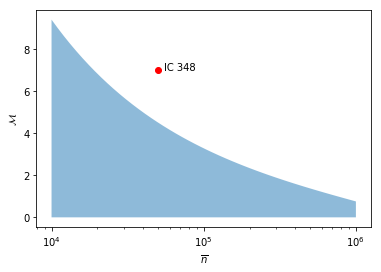

In [33]:
plt.fill_between(nbar, mach, alpha=0.5)
plt.plot([5e4], [7], 'ro')
plt.text(5.5e4, 7, 'IC 348')
plt.xscale('log')
plt.xlabel(r'$\overline{n}$')
plt.ylabel(r'$\mathcal{M}$')
plt.show()